In [1]:
import numpy as np
import pandas as pd # original 1.2.3
from scipy import interpolate
import matplotlib.pyplot as plt

# 1st exemple (no nans):

In [2]:
ex_test = pd.DataFrame({'value': [60,70,90,140,300,120], 'year' : [1990, 1991, 1992,1990, 1991, 1992], 'group' : [1,1,1,2,2,2]}) # some df ith vlaues, temporal unites and groups
ex_test

,value,year,group
0,60,1990,1
1,70,1991,1
2,90,1992,1
3,140,1990,2
4,300,1991,2
5,120,1992,2


In [3]:
q = [[1,2]] * ex_test.shape[0] # list of lists with temporal sub unites. eg. months
ex_test['quarter'] = q # append the colum
ex_test = ex_test.explode('quarter').reset_index(drop=True) # explode the df in reference to the new col and drop the ond index
ex_test.loc[ex_test['quarter'] != 1, 'value'] = np.nan # we'll only keep the original values in the first tempoeal sub unit. Interpolate rest.
ex_test


,value,year,group,quarter
0,60.0,1990,1,1
1,NaN,1990,1,2
2,70.0,1991,1,1
3,NaN,1991,1,2
4,90.0,1992,1,1
5,NaN,1992,1,2
6,140.0,1990,2,1
7,NaN,1990,2,2
8,300.0,1991,2,1
9,NaN,1991,2,2


In [4]:
nt = ex_test['year'].unique().shape[0] * ex_test['quarter'].unique().shape[0] # number of time unites
gn = ex_test['group'].unique().shape[0] # number of groups
ex_test['t_id'] = list(range(nt)) * gn # uniq temporal idenitfier

ex_test

,value,year,group,quarter,t_id
0,60.0,1990,1,1,0
1,NaN,1990,1,2,1
2,70.0,1991,1,1,2
3,NaN,1991,1,2,3
4,90.0,1992,1,1,4
5,NaN,1992,1,2,5
6,140.0,1990,2,1,0
7,NaN,1990,2,2,1
8,300.0,1991,2,1,2
9,NaN,1991,2,2,3


In [5]:
#ex_test = ex_test.groupby('group').apply(lambda x: x.interpolate(method='linear', axis = 0, limit_direction = 'both', fill_value='extrapolate'))
ex_test = ex_test.groupby('group').apply(lambda x: x.interpolate(method='quadratic', axis = 0, limit_direction = 'both', fill_value='extrapolate'))
ex_test

,value,year,group,quarter,t_id
0,60.00,1990,1,1,0
1,63.75,1990,1,2,1
2,70.00,1991,1,1,2
3,78.75,1991,1,2,3
4,90.00,1992,1,1,4
5,103.75,1992,1,2,5
6,140.00,1990,2,1,0
7,262.50,1990,2,2,1
8,300.00,1991,2,1,2
9,252.50,1991,2,2,3


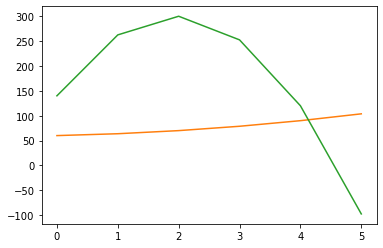

In [6]:
for i in range(3):
    plt.plot(ex_test.loc[ex_test['group'] == i, 't_id'], ex_test.loc[ex_test['group'] == i, 'value'])
plt.show()

# 2nd exemple (large, no nans):

In [7]:

n = 60 # length of the df
ng = 2 # number of groups
obs_g = int(n/ng) # obs per group. Also number of years here
nm = 12 # number of months


values = list(np.sin(range(obs_g))) + list(np.cos(range(obs_g)))  # generate som data
groups = [1] * obs_g + [2] * obs_g # greating a group colum. Groups 1 and 2
years = list(np.arange(1970,1970 + obs_g)) * 2 # years for both groups

ex_test2 = pd.DataFrame({'value': values, 'year' : years, 'group' : groups}) # some df ith vlaues, temporal unites and groups
#ex_test2

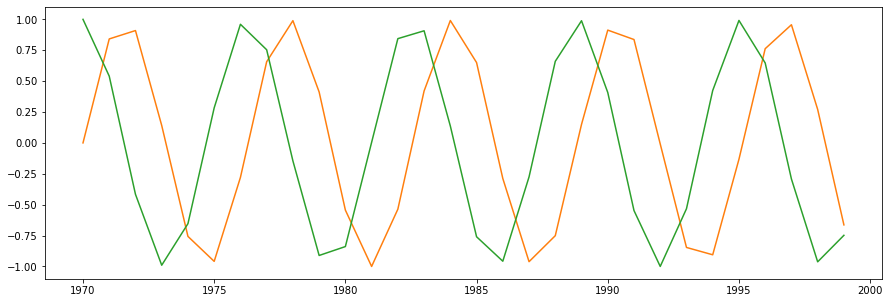

In [8]:
# Checking
plt.figure(figsize=[15,5])
for i in range(3):
    plt.plot(ex_test2.loc[ex_test2['group'] == i, 'year'], ex_test2.loc[ex_test2['group'] == i, 'value'])
plt.show()

In [9]:
months = [list(np.arange(1, nm+1))] * ex_test2.shape[0] # list of lists with temporal sub unites. eg. months
ex_test2['month'] = months # append the colum
ex_test2 = ex_test2.explode('month').reset_index(drop=True) # explode the df in reference to the new col and drop the ond index
ex_test2.loc[ex_test2['month'] != 1, 'value'] = np.nan # we'll only keep the original values in the first tempoeal sub unit. Interpolate rest.

In [10]:
ex_test2['month_id'] = list(range(obs_g * nm)) * ng # number of year x number of months. And then number of groups

In [11]:
ex_test2 = ex_test2.groupby('group').apply(lambda x: x.interpolate(method='quadratic', axis = 0, limit_direction = 'both', fill_value='extrapolate'))
ex_test2

,value,year,group,month,month_id
0,0.000000,1970,1,1,0
1,0.098619,1970,1,2,1
2,0.192057,1970,1,3,2
3,0.280314,1970,1,4,3
4,0.363389,1970,1,5,4
...,...,...,...,...,...
715,-0.176203,1999,2,8,355
716,-0.067640,1999,2,9,356
717,0.047640,1999,2,10,357
718,0.169638,1999,2,11,358


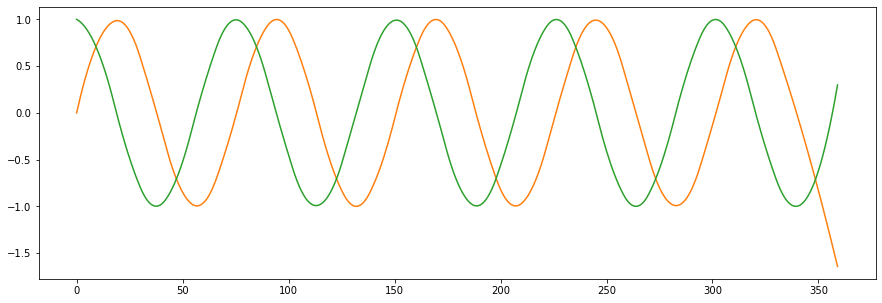

In [12]:
# Checking
plt.figure(figsize=[15,5])
for i in range(3):
    plt.plot(ex_test2.loc[ex_test2['group'] == i, 'month_id'], ex_test2.loc[ex_test2['group'] == i, 'value'])
plt.show()

# 3rd exemple (large, nans):

In [13]:
n = 60 # length of the df
ng = 2 # number of groups
obs_g = int(n/ng) # obs per group. Also number of years here
nm = 12 # number of months

n_nan = 15 # number of nans to introduce

values = list(np.sin(range(obs_g))*2) + list(np.cos(range(obs_g)))  # generate som data
groups = [1] * obs_g + [2] * obs_g # greating a group colum. Groups 1 and 2
years = list(np.arange(1970,1970 + obs_g)) * 2 # years for both groups

ex_test3 = pd.DataFrame({'value': values, 'year' : years, 'group' : groups}) # some df ith vlaues, temporal unites and groups
#ex_test3

#introducing random nans
nan_idx = np.random.choice(ex_test3.index.values, n_nan, replace= False) # values to go nan
ex_test3.loc[ex_test3.index.isin(nan_idx),'value'] = np.nan

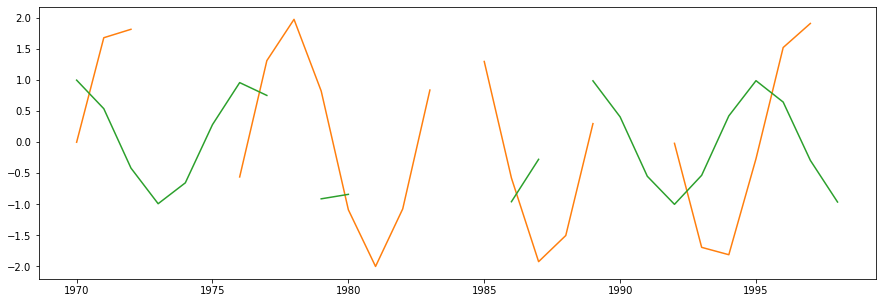

In [14]:
# Checking
plt.figure(figsize=[15,5])
for i in range(3):
    plt.plot(ex_test3.loc[ex_test3['group'] == i, 'year'], ex_test3.loc[ex_test3['group'] == i, 'value'])
plt.show()

In [15]:
months = [list(np.arange(1, nm+1))] * ex_test3.shape[0] # list of lists with temporal sub unites. eg. months
ex_test3['month'] = months # append the colum
ex_test3 = ex_test3.explode('month').reset_index(drop=True) # explode the df in reference to the new col and drop the ond index
ex_test3.loc[ex_test3['month'] != 1, 'value'] = np.nan # we'll only keep the original values in the first tempoeal sub unit. Interpolate rest.
ex_test3['month_id'] = list(range(obs_g * nm)) * ng # number of year x number of months. And then number of groups
ex_test3['observed'] = ex_test3.loc[:,'value'].notna() # an identifier for the non-interpolated values

# interpolate and extrapolate
ex_test3 = ex_test3.groupby('group').apply(lambda x: x.interpolate(method='quadratic', axis = 0, limit_direction = 'both', fill_value='extrapolate'))

# clip at group observed min and max.
ex_test3['value'] = ex_test3.groupby('group').apply(lambda x: np.clip(x['value'], x[x['observed'] == True]['value'].min(), x[x['observed'] == True]['value'].max())).reset_index(drop=True)

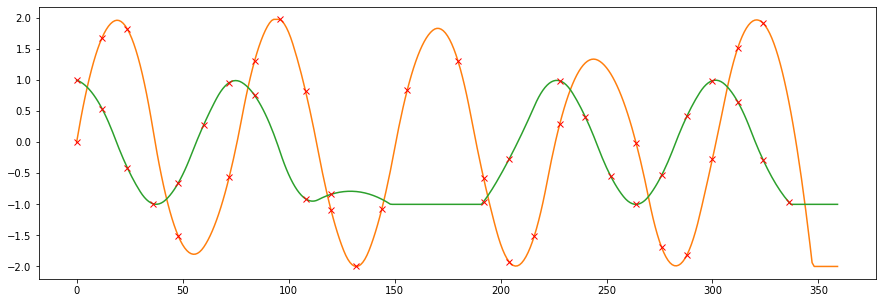

In [16]:
# Checking
plt.figure(figsize=[15,5])
for i in range(3):
    plt.plot(ex_test3.loc[ex_test3['group'] == i, 'month_id'], ex_test3.loc[ex_test3['group'] == i, 'value'])
    plt.plot(ex_test3.loc[(ex_test3['group'] == i) & (ex_test3['observed'] == True), 'month_id'], ex_test3.loc[(ex_test3['group'] == i) & (ex_test3['observed'] == True ), 'value'], 'x', color = 'red')
plt.show()

# 3rd exemple (large, more features, nans):

In [17]:
n = 60 # length of the df
ng = 2 # number of groups
obs_g = int(n/ng) # obs per group. Also number of years here
nm = 12 # number of months

n_nan = 15 # number of nans to introduce

values1 = list(np.sin(range(obs_g))*2) + list(np.cos(range(obs_g)))  # generate som data
values2 = list(np.sin(range(obs_g))+4) + list(np.cos(range(obs_g))*2)  # generate som data


groups = [1] * obs_g + [2] * obs_g # greating a group colum. Groups 1 and 2
years = list(np.arange(1970,1970 + obs_g)) * 2 # years for both groups

ex_test4 = pd.DataFrame({'value1': values1, 'value2': values2, 'year' : years, 'group' : groups}) # some df ith vlaues, temporal unites and groups

#introducing random nans
nan_idx1 = np.random.choice(ex_test4.index.values, n_nan, replace= False) # values to go nan
nan_idx2 = np.random.choice(ex_test4.index.values, n_nan, replace= False) # values to go nan
ex_test4.loc[ex_test4.index.isin(nan_idx1),'value1'] = np.nan
ex_test4.loc[ex_test4.index.isin(nan_idx2),'value2'] = np.nan

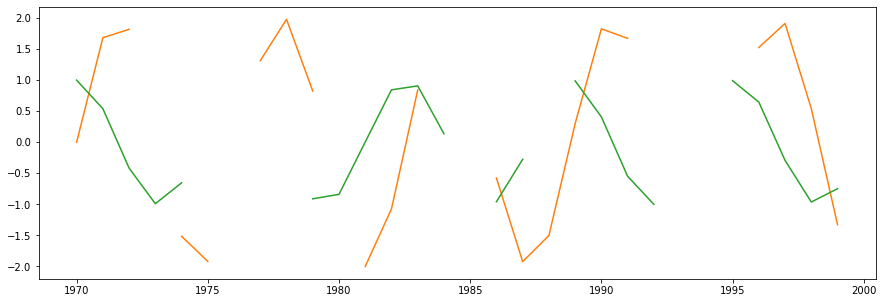

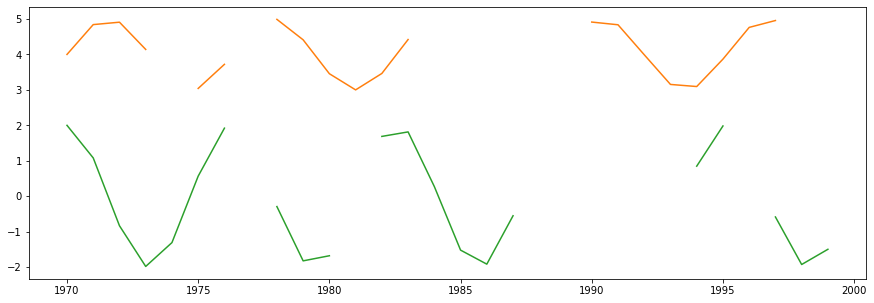

In [18]:
# Checking

for v in ['value1', 'value2']:

    plt.figure(figsize=[15,5])
    for g in range(3):
        plt.plot(ex_test4.loc[ex_test4['group'] == g, 'year'], ex_test4.loc[ex_test4['group'] == g, v])
    plt.show()

In [19]:
months = [list(np.arange(1, nm+1))] * ex_test4.shape[0] # list of lists with temporal sub unites. eg. months
ex_test4['month'] = months # append the colum
ex_test4 = ex_test4.explode('month').reset_index(drop=True) # explode the df in reference to the new col and drop the ond index
ex_test4.loc[ex_test4['month'] != 1, ['value1', 'value2']] = np.nan # we'll only keep the original values in the first tempoeal sub unit. Interpolate rest.
ex_test4['month_id'] = list(range(obs_g * nm)) * ng # number of year x number of months. And then number of groups
ex_test4['observed1'] = ex_test4.loc[:,'value1'].notna() # an identifier for the non-interpolated values
ex_test4['observed2'] = ex_test4.loc[:,'value2'].notna() # an identifier for the non-interpolated values

In [20]:
# interpolate and extrapolate
ex_test4 = ex_test4.groupby('group').apply(lambda x: x.interpolate(method='quadratic', axis = 0, limit_direction = 'both', fill_value='extrapolate'))

In [21]:
# the features that must be interpolated/extrapolated
all_values = ex_test4.columns[:2]

# the feature denoting the corrosponding observed value
all_obs = ex_test4.columns[-2:]

# clip at group observed min and max for each feature.
for v, o in list(zip(all_values, all_obs)):
    ex_test4[v] = ex_test4.groupby('group').apply(lambda x: np.clip(x[v], x[x[o] == True][v].min(), x[x[o] == True][v].max())).reset_index(drop=True)

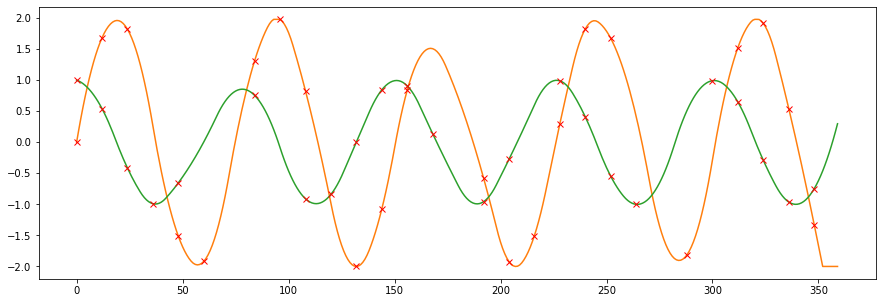

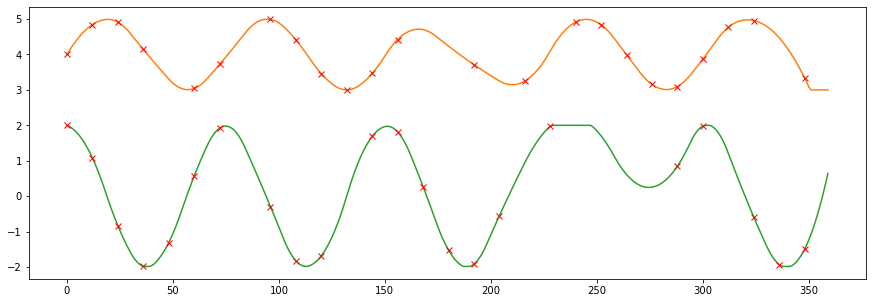

In [22]:
# Checking

for v, o in list(zip(all_values, all_obs)):

    plt.figure(figsize=[15,5])
    for g in range(3):
        plt.plot(ex_test4.loc[ex_test4['group'] == g, 'month_id'], ex_test4.loc[ex_test4['group'] == g, v])
        plt.plot(ex_test4.loc[(ex_test4['group'] == g) & (ex_test4[o] == True), 'month_id'], ex_test4.loc[(ex_test3['group'] == g) & (ex_test4[o] == True ), v], 'x', color = 'red')

    plt.show()

# 5th exemple (as a function) 